In [1]:
# Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import requests
import json
import pandas as pd
import csv
import os


In [2]:
# File to Load (Remember to Change These)
file_to_load = "dogs.csv"

# Read Purchasing File and store into Pandas data frame
dogs_sw = pd.read_csv(file_to_load)

dogs_sw.head()


,Unnamed: 0,id,organization_id,url,type,species,breeds,colors,age,gender,...,color1,color2,color3,spayed_neutered,house_trained,special_needs,shots_current,friendly_children,friendly_dogs,friendly_cats
0,0,47072487,CA803,https://www.petfinder.com/dog/rowan-47072487/c...,Dog,Dog,"{'primary': 'Siberian Husky', 'secondary': Non...","{'primary': None, 'secondary': None, 'tertiary...",Adult,Female,...,NaN,NaN,NaN,True,False,False,False,NaN,NaN,NaN
1,1,47072473,IN112,https://www.petfinder.com/dog/freeway-47072473...,Dog,Dog,"{'primary': 'Jack Russell Terrier', 'secondary...","{'primary': 'Brown / Chocolate', 'secondary': ...",Senior,Male,...,Brown / Chocolate,White / Cream,NaN,True,False,True,True,True,True,NaN
2,2,47072474,NC924,https://www.petfinder.com/dog/tokie-47072474/n...,Dog,Dog,"{'primary': 'Shih Tzu', 'secondary': None, 'mi...","{'primary': 'White / Cream', 'secondary': None...",Young,Male,...,White / Cream,NaN,NaN,True,True,False,True,False,NaN,False
3,3,47072469,GA916,https://www.petfinder.com/dog/rambo-47072469/f...,Dog,Dog,"{'primary': 'Cocker Spaniel', 'secondary': Non...","{'primary': 'Black', 'secondary': 'Yellow / Ta...",Young,Male,...,Black,Yellow / Tan / Blond / Fawn,NaN,True,True,False,True,NaN,True,NaN
4,4,47072434,ON305,https://www.petfinder.com/dog/rosie-and-posie-...,Dog,Dog,"{'primary': 'Goldendoodle', 'secondary': None,...","{'primary': None, 'secondary': None, 'tertiary...",Baby,Female,...,NaN,NaN,NaN,False,True,False,True,True,True,True


In [3]:
dogs_sw.keys()

Index(['Unnamed: 0', 'id', 'organization_id', 'url', 'type', 'species',
       'breeds', 'colors', 'age', 'gender', 'size', 'coat', 'attributes',
       'environment', 'tags', 'name', 'description', 'photos', 'status',
       'status_changed_at', 'published_at', 'distance', 'contact', '_links',
       'primary_breed', 'secondary_breeds', 'city', 'state', 'zip', 'country',
       'color1', 'color2', 'color3', 'spayed_neutered', 'house_trained',
       'special_needs', 'shots_current', 'friendly_children', 'friendly_dogs',
       'friendly_cats'],
      dtype='object')

In [4]:
unseries = dogs_sw.nunique()
unseries

Unnamed: 0           20000
id                   19947
organization_id       3346
url                  19947
type                     1
species                  1
breeds                1905
colors                 188
age                      4
gender                   2
size                     4
coat                     6
attributes              16
environment             27
tags                   883
name                  9363
description          11970
photos               18737
status                   3
status_changed_at    13719
published_at         13790
distance                 0
contact               3597
_links               19947
primary_breed          207
secondary_breeds       157
city                  2050
state                   60
zip                   3074
country                  2
color1                  15
color2                  15
color3                  12
spayed_neutered          2
house_trained            2
special_needs            2
shots_current            2
f

In [5]:
female_dogs_df = dogs_sw[dogs_sw["gender"]=="Female"]
female_dogs_df.head()

,Unnamed: 0,id,organization_id,url,type,species,breeds,colors,age,gender,...,color1,color2,color3,spayed_neutered,house_trained,special_needs,shots_current,friendly_children,friendly_dogs,friendly_cats
0,0,47072487,CA803,https://www.petfinder.com/dog/rowan-47072487/c...,Dog,Dog,"{'primary': 'Siberian Husky', 'secondary': Non...","{'primary': None, 'secondary': None, 'tertiary...",Adult,Female,...,NaN,NaN,NaN,True,False,False,False,NaN,NaN,NaN
4,4,47072434,ON305,https://www.petfinder.com/dog/rosie-and-posie-...,Dog,Dog,"{'primary': 'Goldendoodle', 'secondary': None,...","{'primary': None, 'secondary': None, 'tertiary...",Baby,Female,...,NaN,NaN,NaN,False,True,False,True,True,True,True
7,7,47072432,OH415,https://www.petfinder.com/dog/christmas-past-4...,Dog,Dog,"{'primary': 'Beagle', 'secondary': 'Jack Russe...","{'primary': 'Tricolor (Brown, Black, & White)'...",Baby,Female,...,"Tricolor (Brown, Black, & White)",NaN,NaN,True,False,False,True,NaN,NaN,NaN
8,8,47072466,KS07,https://www.petfinder.com/dog/gwen-47072466/ks...,Dog,Dog,"{'primary': 'Dogue de Bordeaux', 'secondary': ...","{'primary': None, 'secondary': None, 'tertiary...",Adult,Female,...,NaN,NaN,NaN,True,False,False,True,NaN,NaN,NaN
11,11,47072445,TX2126,https://www.petfinder.com/dog/priscilla-470724...,Dog,Dog,{'primary': 'Australian Cattle Dog / Blue Heel...,"{'primary': None, 'secondary': None, 'tertiary...",Young,Female,...,NaN,NaN,NaN,False,False,False,False,NaN,NaN,NaN


In [6]:
male_dogs_df = dogs_sw[dogs_sw["gender"]=="Male"]
male_dogs_df.head()

,Unnamed: 0,id,organization_id,url,type,species,breeds,colors,age,gender,...,color1,color2,color3,spayed_neutered,house_trained,special_needs,shots_current,friendly_children,friendly_dogs,friendly_cats
1,1,47072473,IN112,https://www.petfinder.com/dog/freeway-47072473...,Dog,Dog,"{'primary': 'Jack Russell Terrier', 'secondary...","{'primary': 'Brown / Chocolate', 'secondary': ...",Senior,Male,...,Brown / Chocolate,White / Cream,NaN,True,False,True,True,True,True,NaN
2,2,47072474,NC924,https://www.petfinder.com/dog/tokie-47072474/n...,Dog,Dog,"{'primary': 'Shih Tzu', 'secondary': None, 'mi...","{'primary': 'White / Cream', 'secondary': None...",Young,Male,...,White / Cream,NaN,NaN,True,True,False,True,False,NaN,False
3,3,47072469,GA916,https://www.petfinder.com/dog/rambo-47072469/f...,Dog,Dog,"{'primary': 'Cocker Spaniel', 'secondary': Non...","{'primary': 'Black', 'secondary': 'Yellow / Ta...",Young,Male,...,Black,Yellow / Tan / Blond / Fawn,NaN,True,True,False,True,NaN,True,NaN
5,5,47072460,AR238,https://www.petfinder.com/dog/spanky-47072460/...,Dog,Dog,"{'primary': 'Spaniel', 'secondary': 'Pointer',...","{'primary': 'White / Cream', 'secondary': 'Yel...",Young,Male,...,White / Cream,Yellow / Tan / Blond / Fawn,NaN,True,False,False,True,True,True,NaN
6,6,47072459,IN53,https://www.petfinder.com/dog/twix-star-1-20-2...,Dog,Dog,"{'primary': 'Treeing Walker Coonhound', 'secon...","{'primary': None, 'secondary': None, 'tertiary...",Young,Male,...,NaN,NaN,NaN,True,True,False,True,NaN,True,NaN


In [7]:
female_name = female_dogs_df['name'].value_counts()
female_name.head(10)

bella    75
lucy     65
luna     60
daisy    58
molly    56
lola     44
sadie    40
holly    36
sasha    36
coco     35
Name: name, dtype: int64

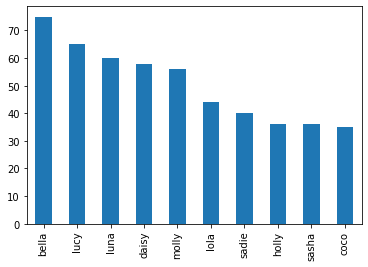

In [8]:
female_name_plot = female_name.iloc[0:10].plot(kind='bar')


In [9]:
male_name = male_dogs_df['name'].value_counts()
male_name.head(10)

max        84
buddy      62
charlie    53
bear       43
jack       42
duke       42
rocky      41
toby       34
milo       34
finn       30
Name: name, dtype: int64

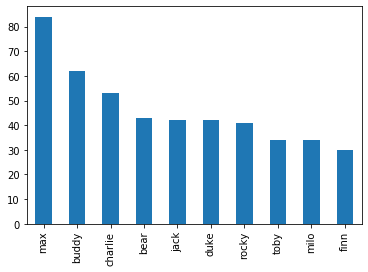

In [10]:
Male_name_plot = male_name.iloc[0:10].plot(kind='bar')

In [11]:
#Find total number of dogs in the data set
total_population = len(dogs_sw.house_trained)
total_population

20000

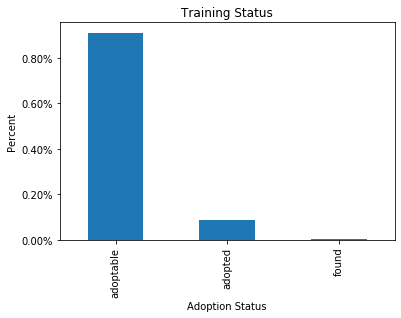

In [33]:
# Group data by status
groupby_status_sw = dogs_sw.groupby("status")

# Group house-trained dog by status
house_trained_status = groupby_status_sw["house_trained"].count()

#Find percentage of house-trained dog by status
house_trained_status_percentage = (house_trained_status/total_population)
house_trained_status_percentage
house_trained_df = pd.DataFrame({"house_trained_status": house_trained_status,"house_trained_status_percentage":house_trained_status_percentage})

# Format with %
house_trained_df.style.format({"house_trained_status_percentage": "{:,.2%}"})

house_trained_df = house_trained_df["house_trained_status_percentage"].plot(kind='bar')

# # Set a Title and labels
plt.title("Training Status")
plt.xlabel("Adoption Status")
plt.ylabel("Percent")

import matplotlib.ticker as mtick

house_trained_df.yaxis.set_major_formatter(mtick.PercentFormatter())

# in every # of dogs, X # of dogs will be adopted

In [18]:
house_trained = pd.DataFrame({"Trained":trained_population})
house_trained
# Find out how many dogs are not being house trained and being house trained 
total_trained_untrained = dogs_sw['house_trained'].value_counts()/total_population

# Format with %
#total_trained_untrained.style.format([1]: "{:,.2%}"})

#total_trained_untrained

In [19]:
total_trained_untrained

False    0.8006
True     0.1994
Name: house_trained, dtype: float64

In [20]:
total_trained_untrained1 = dogs_sw['house_trained'].value_counts()
total_trained_untrained_df = pd.DataFrame(total_trained_untrained1)
total_trained_untrained_df 

,house_trained
False,16012
True,3988


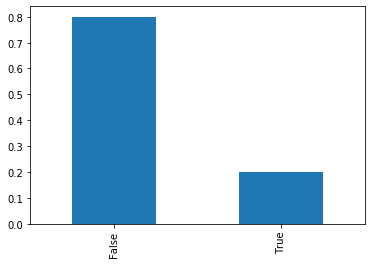

In [21]:
total_trained_untrained.plot(kind='bar')

In [22]:
trained_1 = dogs_sw[dogs_sw.status=='adopted'].groupby(['house_trained'])["status"].value_counts()
trained_1_pd  = pd.DataFrame({"Total House Trained Attribute Adopted":trained_1})




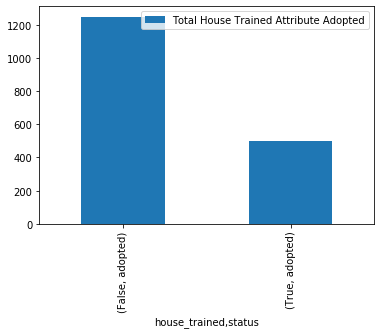

In [23]:

trained_1_pd.plot(kind='bar')

In [25]:
# Analyze population of dogs that are house trained
trained_population = dogs_sw[dogs_sw.house_trained==True]['house_trained'].value_counts()

# Group house trained dogs by status
trained_population_df = dogs_sw[dogs_sw.house_trained==True].groupby(by='status').count()[['house_trained']]
trained_population_df

,house_trained
status,
adoptable,3491
adopted,496
found,1


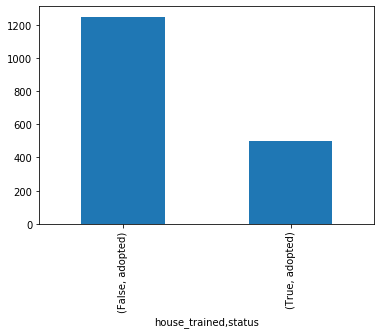

In [26]:
# Plot 
trained_1 = dogs_sw[dogs_sw.status=='adopted'].groupby(['house_trained'])["status"].value_counts()
trained_percent_1 = 
trained_1.plot(kind='bar')



In [35]:
adopt = dogs_sw[dogs_sw.status=='adopted']["status"].count()
adopt

1746

In [27]:
df1 = dogs_sw[['house_trained','status','id']].groupby(['status','house_trained']).count()
df2 = dogs_sw[['status','id']].groupby(['status']).count()
 
display(df1)
display(df2)
df = df1/df2
df.id

id
status    house_trained       
adoptable False          14723
          True            3491
adopted   False           1250
          True             496
found     False             39
          True               1

,id
status,
adoptable,18214
adopted,1746
found,40


status     house_trained
adoptable  False            0.808334
           True             0.191666
adopted    False            0.715922
           True             0.284078
found      False            0.975000
           True             0.025000
Name: id, dtype: float64

In [28]:
#percent = trained_1_pd.iloc[:,2]/house_trained.iloc[:,1]
total_trained_untrained_df

,house_trained
False,16012
True,3988


In [31]:
#Although dogs that are not hourse trained are adopted

house_trained_status_adopted_percentage = (trained_population_df/total_trained_untrained_df)
house_trained_status_adopted_percentage

,house_trained
adoptable,NaN
adopted,NaN
found,NaN
False,NaN
True,NaN


In [32]:
house_trained_status_adopted_percentage = (496/3988)
house_trained_status_adopted_percentage


0.12437311935807423

In [30]:
house_trained_status_adoptedable_percentage = (1250/16012)
house_trained_status_adoptedable_percentage

0.07806645016237822

In [ ]:
percent_adptable_df = pd.DataFrame({"House Trained Status Adopted": house_trained_status_adopted_percentage,"House Trained Status Adopted": house_trained_status_adoptedable_percentage})

percent_adptable_df
#type(house_trained_status)
# groupby_status["house_trained"].head()
#house_trained_status.head()
# groupby_status[]

# groupby_status.head()

# Format with %
#percent_adptable.style.format({"house_trained_status_percentage": "{:,.2%}"})



In [ ]:
trained_df = pd.DataFrame(trained)

# Reset DataFrame Index
trained_df.reset_index(inplace = True)
trained_df

In [ ]:
# Minor Data Munging to Re-Format the Data Frames and use "Timepoint" as an index so they will be used as lables
trained_df_pivot = trained_df.pivot(index="house_trained", columns="status", values="house_trained")

# Preview that Reformatting worked
trained_df_pivot.head()



In [ ]:
status = trained.groupby(['status']).values()
status



In [ ]:
house_trained = pd.DataFrame({"Trained":trained})
house_trained.round(2)

In [ ]:
status=dogs_sw.groupby(['status']).mean()
status

In [ ]:
type(status)


In [ ]:

status.house_trained.plot(kind='bar')

In [ ]:
house_trained = dogs_sw.gropby(['house_trained']).count()
status

In [ ]:
df['a'].value_counts()

In [ ]:

trained_population_df.iloc[1]/ total_trained_untrained_df.iloc[1]

